In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SGD:
    def __init__(self, param1 = None, param2 = None, lr=0.01):
        self.lr = lr
        self.params = {'param1':param1, 'param2':param2}
        self.grads = {}
               
    def update(self, dparam1 = None, dparam2 = None):
        self.grads['param1'] = dparam1
        self.grads['param2'] = dparam2       
        for key in self.params.keys():
            if self.params[key] is None:
                continue
            self.params[key] -= self.lr*self.grads[key]
        
class Momentum:
    def __init__(self, param1 = None, param2 = None, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.params = {'param1':param1, 'param2':param2}
        self.grads = {}
        self.v = {}
        for key in self.params.keys():
            if self.params[key] is None:
                continue
            self.v[key] = np.zeros_like(self.params[key])
               
    def update(self, dparam1 = None, dparam2 = None):
        self.grads['param1'] = dparam1
        self.grads['param2'] = dparam2       
        for key in self.params.keys():
            if self.params[key] is None:
                continue
            self.v[key] = self.momentum*self.v[key] - self.lr*self.grads[key]
            self.params[key] += self.v[key]

class AdaGrad:
    def __init__(self, param1 = None, param2 = None, lr=0.01):
        self.lr = lr
        self.params = {'param1':param1, 'param2':param2}
        self.grads = {}
        self.h = {}
        for key in self.params.keys():
            if self.params[key] is None:
                continue
            self.h[key] = np.zeros_like(self.params[key])
               
    def update(self, dparam1 = None, dparam2 = None):
        self.grads['param1'] = dparam1
        self.grads['param2'] = dparam2       
        for key in self.params.keys():
            if self.params[key] is None:
                continue
            self.h[key] += self.grads[key]*self.grads[key]
            self.params[key] -= self.lr*self.grads[key]/(np.sqrt(self.h[key]) + 1e-7)

class RMSprop:
    def __init__(self, param1 = None, param2 = None, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.params = {'param1':param1, 'param2':param2}
        self.grads = {}
        self.h = {}
        for key in self.params.keys():
            if self.params[key] is None:
                continue
            self.h[key] = np.zeros_like(self.params[key])
               
    def update(self, dparam1 = None, dparam2 = None):
        self.grads['param1'] = dparam1
        self.grads['param2'] = dparam2       
        for key in self.params.keys():
            if self.params[key] is None:
                continue
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate)*self.grads[key]*self.grads[key]
            self.params[key] -= self.lr*self.grads[key]/(np.sqrt(self.h[key]) + 1e-7)

class Adam:
    def __init__(self, param1 = None, param2 = None, lr = 0.001, beta1 = 0.9, beta2 = 0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.params = {'param1':param1, 'param2':param2}
        self.m = {}
        self.v = {}
        self.grads = {}
        for key in self.params.keys():
            if self.params[key] is None:
                continue
            self.m[key] = np.zeros_like(self.params[key])
            self.v[key] = np.zeros_like(self.params[key])
               
    def update(self, dparam1 = None, dparam2 = None):
        self.grads['param1'] = dparam1
        self.grads['param2'] = dparam2
        self.iter += 1
        lr_t  = self.lr*np.sqrt(1.0 - self.beta2**self.iter)/(1.0 - self.beta1**self.iter)        
        for key in self.params.keys():
            if self.params[key] is None:
                continue
            self.m[key] += (1 - self.beta1)*(self.grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2)*(self.grads[key]**2 - self.v[key])            
            self.params[key] -= lr_t*self.m[key]/(np.sqrt(self.v[key]) + 1e-7)

In [3]:
class Affine:
    def __init__(self, inputDim, outputDim, learningRate = 0.001, weight = 0.01):
        self.name = 'affine'
        self.W = weight*np.random.randn(inputDim, outputDim)
        self.b = np.zeros(outputDim)
        self.lr = learningRate
        #self.optimizer = Adam(self.W, self.b, self.lr)
        self.optimizer = SGD(self.W, self.b, self.lr) #変更点
        self.trainable = None
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x, train_flg = True):
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        if self.trainable:
            self.dW = np.dot(self.x.T, dout)
            self.db = np.sum(dout, axis = 0)
            self.optimizer.update(self.dW, self.db)
        return dx

class Relu:
    def __init__(self):
        self.name = 'relu'
        self.mask = None
        self.trainable = None

    def forward(self, x, train_flg = True):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

class LeakyRelu:
    def __init__(self, alpha = 0.01):
        self.name = 'leakyRelu'
        self.alpha = alpha
        self.mask = None
        self.trainable = None

    def forward(self, x, train_flg = True):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = x[self.mask]*self.alpha
        return out

    def backward(self, dout):
        dout[self.mask] = dout[self.mask]*self.alpha
        dx = dout
        return dx

class Sigmoid:
    def __init__(self):
        self.name = 'sigmoid'
        self.out = None
        self.trainable = None

    def forward(self, x, train_flg = True):
        out = 1/(1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout*(1.0 - self.out)*self.out
        return dx

class Tanh:
    def __init__(self):
        self.name = 'tanh'
        self.out = None
        self.trainable = None

    def forward(self, x, train_flg = True):
        out = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout*(1.0 - self.out*self.out)
        return dx

class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.name = 'dropout'
        self.dropout_ratio = dropout_ratio
        self.mask = None
        self.trainable = None

    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x*self.mask
        else:
            return x*(1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout*self.mask

class BatchNormalization:
    def __init__(self, gamma, beta, momentum = 0.9, learningRate = 0.001, running_mean = None, running_var = None):
        self.name = 'batchNorm'
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.lr = learningRate
        self.trainable = None
        self.optimizer = Adam(self.gamma, self.beta, self.lr)
        self.running_mean = running_mean
        self.running_var = running_var          
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg = True):
        out = self.__forward(x, train_flg)        
        return out
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)                        
        if train_flg:
            mu = x.mean(axis = 0)
            xc = x - mu
            var = np.mean(xc**2, axis = 0)
            std = np.sqrt(var + 10e-7)
            xn = xc/std            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum*self.running_mean + (1 - self.momentum)*mu
            self.running_var = self.momentum*self.running_var + (1 - self.momentum)*var            
        else:
            xc = x - self.running_mean
            xn = xc/((np.sqrt(self.running_var + 10e-7)))            
        out = self.gamma*xn + self.beta 
        return out

    def backward(self, dout):
        dx = self.__backward(dout)
        if self.trainable:
            self.optimizer.update(self.dgamma, self.dbeta)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis = 0)
        dgamma = np.sum(self.xn*dout, axis = 0)
        dxn = self.gamma*dout
        dxc = dxn/self.std
        dstd = -np.sum((dxn*self.xc)/(self.std*self.std), axis = 0)
        dvar = 0.5*dstd/self.std
        dxc += (2.0/self.batch_size)*self.xc*dvar
        dmu = np.sum(dxc, axis = 0)
        dx = dxc - dmu/self.batch_size        
        self.dgamma = dgamma
        self.dbeta = dbeta        
        return dx

class MSELoss:
    def __init__(self):
        self.name = 'mse'
        self.loss = None
        self.y = None 
        self.t = None 
        self.trainable = None

    def forward(self, y, t):
        self.t = t
        self.y = y
        batch_size = self.y.shape[0]
        self.loss = 0.5*np.sum((y - t)**2)/batch_size        
        return self.loss

    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t)/batch_size
        return dx


In [4]:
class SequentialGen:
    def __init__(self):
        self.layersPre = None
        self.lastLayer = None
        self.layers = []
        self.trainable = True

    def compile(self):
        for i in self.layersPre:
            if i[0] == 'Dense':
                self.layers.append(Affine(i[1], i[2], i[3], i[4]))
            elif i[0] == 'Relu':
                self.layers.append(Relu())
            elif i[0] == 'LeakyRelu':
                self.layers.append(LeakyRelu(i[1]))
            elif i[0] == 'BatchNormalization':
                self.layers.append(BatchNormalization(i[1], i[2], i[3], i[4]))
            elif i[0] == 'Sigmoid':
                self.layers.append(Sigmoid())
            elif i[0] == 'Tanh':
                self.layers.append(Tanh())

    def predict(self, x, isTrain):
        for layer in self.layers:
            x = layer.forward(x, isTrain)
        return x

    def backProp(self, x):
        for layer in self.layers:
            layer.trainable = self.trainable
        self.layers.reverse()
        for layer in self.layers:
            x = layer.backward(x)
        self.layers.reverse()
        return

In [5]:
class SequentialDis:
    def __init__(self):
        self.layersPre = None
        self.lastLayer = None
        self.layers = []
        self.trainable = True
        self.lastLayer = None

    def compile(self):
        for i in self.layersPre:
            if i[0] == 'Dense':
                self.layers.append(Affine(i[1], i[2], i[3], i[4]))
            elif i[0] == 'Relu':
                self.layers.append(Relu())
            elif i[0] == 'LeakyRelu':
                self.layers.append(LeakyRelu(i[1]))
            elif i[0] == 'BatchNormalization':
                self.layers.append(BatchNormalization(i[1], i[2], i[3], i[4]))
            elif i[0] == 'Sigmoid':
                self.layers.append(Sigmoid())
            elif i[0] == 'Tanh':
                self.layers.append(Tanh())
            elif i[0] == 'MSELoss':
                self.lastLayer = MSELoss()
            """elif i[0] == 'CrossEntropy':
                self.lastLayer = CrossEntropy()"""

    def train(self, x, t, isTrain):
        for layer in self.layers:
            layer.trainable = self.trainable
        vals = [0]*2
        for layer in self.layers:
            x = layer.forward(x, isTrain)
        vals[0] = self.lastLayer.forward(x, t)
        if not isTrain:
            return vals
        dout = 1
        dout = self.lastLayer.backward(dout)
        self.layers.reverse()
        for layer in self.layers:
            dout = layer.backward(dout)
        vals[1] = dout
        self.layers.reverse()
        return vals

In [6]:
class GAN:
    def __init__(self, inpGen, inpDis):
        self.inpGen = inpGen
        self.inpDis = inpDis
        self.generator = self.buildGenerator()
        self.discriminator = self.buildDiscriminator()
        self.losses = {'genTrain':[],'disTrain':[],'genTest':[],'disTest':[]}
        self.params = {}
        idx = 1
        for e in self.generator.layers:
            if e.name=='affine':
                self.params['gen_W'+str(idx)] = []
                self.params['gen_b'+str(idx)] = []
                idx += 1
        idx = 1
        for e in self.discriminator.layers:
            if e.name=='affine':
                self.params['dis_W'+str(idx)] = []
                self.params['dis_b'+str(idx)] = []
                idx += 1

    def buildGenerator(self):
        model = SequentialGen()
        model.layersPre = [
            ('Dense', self.inpGen, 100, 0.001, 0.01),
            ('Dense', 100, 200, 0.001, 0.01)
            ]
        """('Dense', self.inpGen, 50, 0.001, 0.01),
            ('LeakyRelu', 0.2), 
            ('BatchNormalization', np.ones(50), np.zeros(50), 0.8, 0.001), 
            ('Dense', 50, 100, 0.001, 0.01), 
            ('LeakyRelu', 0.2), 
            ('BatchNormalization', np.ones(100), np.zeros(100), 0.8, 0.001), 
            ('Dense', 100, self.inpDis, 0.001, 0.01), 
            ('Tanh', None)"""
        model.compile()
        return model

    def buildDiscriminator(self):
        model = SequentialDis()
        model.layersPre = [
            ('Dense', self.inpDis, 100, 0.001, 0.01),
            ('Dense', 100, 1, 0.001, 0.01), 
            ('Sigmoid', None), 
            ('MSELoss', None)
            ]
        """('Dense', self.inpDis, 50, 0.001, 0.01),
            ('LeakyRelu', 0.2), 
            ('BatchNormalization', np.ones(50), np.zeros(50), 0.8, 0.001), 
            ('Dense', 50, 100, 0.001, 0.01), 
            ('LeakyRelu', 0.2), 
            ('BatchNormalization', np.ones(100), np.zeros(100), 0.8, 0.001), 
            ('Dense', 100, 1, 0.001, 0.01), 
            ('Sigmoid', None), 
            ('MSELoss', None)""" 
        model.compile()
        return model

    def fit(self, fnameTrain, fnameTest, itersNum = 100000, batchSize = 100, validationSplit = 0.2):
        dataTrain = np.loadtxt(fnameTrain, delimiter = ',')
        dataTest = np.loadtxt(fnameTest, delimiter = ',')
        indices = np.arange(dataTrain.shape[0])
        np.random.shuffle(indices)
        validationSize = int(dataTrain.shape[0]*validationSplit)
        xTrain, xTest = dataTrain[indices[:-validationSize], :], dataTrain[indices[-validationSize:], :]
        tTrain, tTest = dataTest[indices[:-validationSize], :], dataTest[indices[-validationSize:], :]
        trainSize = xTrain.shape[0]
        testSize = xTest.shape[0]
        iterPerEpoch = max(trainSize/batchSize, 1)
        for i in range(1,itersNum+1):
            #Discriminatorの学習
            self.discriminator.traineble = True
            batchMask = np.random.choice(trainSize, int(batchSize/2))
            xBatch = xTrain[batchMask]
            tBatch = tTrain[batchMask]
            vecVal = np.add(xBatch, tBatch)
            vecFal = np.add(xBatch, self.generator.predict(xBatch, True))
            lossVal = self.discriminator.train(vecVal, np.ones((int(batchSize/2), 1)), True)[0]
            lossFal = self.discriminator.train(vecFal, np.zeros((int(batchSize/2), 1)), True)[0]
            lossMean = 0.5*np.add(lossVal, lossFal)
            #Generatorの学習
            self.discriminator.trainable = False
            batchMask = np.random.choice(trainSize, batchSize)
            xBatch = xTrain[batchMask]
            vecFal = np.add(xBatch, self.generator.predict(xBatch, True))
            values = self.discriminator.train(vecFal, np.ones((batchSize, 1)), True)
            self.generator.backProp(values[1])

            if i%iterPerEpoch == 0:
                idx = 1
                for e in self.generator.layers:
                    if e.name=='affine':
                        self.params['gen_W'+str(idx)].append(np.sum(e.W)/e.W.size)
                        self.params['gen_b'+str(idx)].append(np.sum(e.b)/e.b.size)
                        idx += 1
                idx = 1
                for e in self.discriminator.layers:
                    if e.name=='affine':
                        self.params['dis_W'+str(idx)].append(np.sum(e.W)/e.W.size)
                        self.params['dis_b'+str(idx)].append(np.sum(e.b)/e.b.size)
                        idx += 1
                self.losses['genTrain'].append(values[0])
                self.losses['disTrain'].append(lossMean)
                #Discriminatorのテスト
                batchMask = np.random.choice(testSize, int(batchSize/2))
                xBatch = xTest[batchMask]
                tBatch = tTest[batchMask]
                vecVal = np.add(xBatch, tBatch)
                vecFal = np.add(xBatch, self.generator.predict(xBatch, False))
                lossVal = self.discriminator.train(vecVal, np.ones((int(batchSize/2), 1)), False)[0]
                lossFal = self.discriminator.train(vecFal, np.zeros((int(batchSize/2), 1)), False)[0]
                lossMean = 0.5*np.add(lossVal, lossFal)
                #Generatorのテスト
                batchMask = np.random.choice(testSize, batchSize)
                xBatch = xTest[batchMask]
                vecFal = np.add(xBatch, self.generator.predict(xBatch, False))
                values = self.discriminator.train(vecFal, np.ones((batchSize, 1)), False)
                self.losses['genTest'].append(values[0])
                self.losses['disTest'].append(lossMean)
                print('iter number : {}/{}, lossDisTest = {}, lossGenTest = {}'.format(i, itersNum, lossMean, values[0]))

    def predict(self, fnameSim):
        dataSim = np.reshape(np.loadtxt(fnameSim, delimiter = ','), (1,200))
        pred = self.generator.predict(dataSim, False)
        return pred

In [7]:
gan = GAN(200, 200)
gan.fit('./img100000.csv', './rindex100000.csv')

iter number : 80/100000, lossDisTest = 0.1261659647167539, lossGenTest = 0.12047617116836401
iter number : 160/100000, lossDisTest = 0.12617225975764945, lossGenTest = 0.12063169638109775
iter number : 240/100000, lossDisTest = 0.12617120429346834, lossGenTest = 0.12037182199760064
iter number : 320/100000, lossDisTest = 0.12616645703805757, lossGenTest = 0.12043728062979708
iter number : 400/100000, lossDisTest = 0.12619192112382996, lossGenTest = 0.1205314544985443
iter number : 480/100000, lossDisTest = 0.12618634715515076, lossGenTest = 0.1202957317736465
iter number : 560/100000, lossDisTest = 0.12619446413858337, lossGenTest = 0.12035383303287311
iter number : 640/100000, lossDisTest = 0.12620327610680618, lossGenTest = 0.12052805645843069
iter number : 720/100000, lossDisTest = 0.12621564057440032, lossGenTest = 0.12044134453777378
iter number : 800/100000, lossDisTest = 0.12620728620405675, lossGenTest = 0.1203614833845309
iter number : 880/100000, lossDisTest = 0.1262234667878

iter number : 6960/100000, lossDisTest = 0.12682206576849797, lossGenTest = 0.11928812832123255
iter number : 7040/100000, lossDisTest = 0.12680164661425364, lossGenTest = 0.11922573134624236
iter number : 7120/100000, lossDisTest = 0.12682629578556376, lossGenTest = 0.11933895884956357
iter number : 7200/100000, lossDisTest = 0.1268588812541882, lossGenTest = 0.11914893650069787
iter number : 7280/100000, lossDisTest = 0.1268438199207675, lossGenTest = 0.11910408914846382
iter number : 7360/100000, lossDisTest = 0.12684272035879768, lossGenTest = 0.11902389993328949
iter number : 7440/100000, lossDisTest = 0.12686822591040736, lossGenTest = 0.11927361975613518
iter number : 7520/100000, lossDisTest = 0.12689748080316265, lossGenTest = 0.1190307516912811
iter number : 7600/100000, lossDisTest = 0.12689732405333454, lossGenTest = 0.11913369963176403
iter number : 7680/100000, lossDisTest = 0.12693143505350837, lossGenTest = 0.11902703636231278
iter number : 7760/100000, lossDisTest = 0.

iter number : 13840/100000, lossDisTest = 0.1283185563992384, lossGenTest = 0.11641233528037902
iter number : 13920/100000, lossDisTest = 0.12834544040031481, lossGenTest = 0.1165538119365188
iter number : 14000/100000, lossDisTest = 0.12833602488094825, lossGenTest = 0.11616428060039226
iter number : 14080/100000, lossDisTest = 0.12842041922361958, lossGenTest = 0.11620841838628522
iter number : 14160/100000, lossDisTest = 0.12850901382772778, lossGenTest = 0.1159261795455615
iter number : 14240/100000, lossDisTest = 0.12840784209175293, lossGenTest = 0.11617896494063024
iter number : 14320/100000, lossDisTest = 0.12849805951153162, lossGenTest = 0.11612650247954875
iter number : 14400/100000, lossDisTest = 0.12854528699238507, lossGenTest = 0.11576736043088962
iter number : 14480/100000, lossDisTest = 0.12854320591893423, lossGenTest = 0.11615421281303348
iter number : 14560/100000, lossDisTest = 0.12852761057553475, lossGenTest = 0.11586817044087082
iter number : 14640/100000, lossD

iter number : 27360/100000, lossDisTest = 0.14288878809690267, lossGenTest = 0.0924067756976666
iter number : 27440/100000, lossDisTest = 0.14284627458475813, lossGenTest = 0.09163335812111846
iter number : 27520/100000, lossDisTest = 0.14227537023591444, lossGenTest = 0.09224106421197041
iter number : 27600/100000, lossDisTest = 0.14293420615058056, lossGenTest = 0.09102794387920192
iter number : 27680/100000, lossDisTest = 0.143270320183037, lossGenTest = 0.09108030938827855
iter number : 27760/100000, lossDisTest = 0.14372981417765177, lossGenTest = 0.09084736651316244
iter number : 27840/100000, lossDisTest = 0.14443582602769894, lossGenTest = 0.09079508615293662
iter number : 27920/100000, lossDisTest = 0.14439636636870423, lossGenTest = 0.09019899360087556
iter number : 28000/100000, lossDisTest = 0.1447428010852855, lossGenTest = 0.0901243731068698
iter number : 28080/100000, lossDisTest = 0.14435480751670468, lossGenTest = 0.0904564711725711
iter number : 28160/100000, lossDisT

iter number : 34240/100000, lossDisTest = 0.1653393266883912, lossGenTest = 0.06280555526728507
iter number : 34320/100000, lossDisTest = 0.16643452818220447, lossGenTest = 0.06226967968319374
iter number : 34400/100000, lossDisTest = 0.16554372075698995, lossGenTest = 0.06147076049458767
iter number : 34480/100000, lossDisTest = 0.16704150519839944, lossGenTest = 0.06214267066914291
iter number : 34560/100000, lossDisTest = 0.16699948870005993, lossGenTest = 0.0615598607937823
iter number : 34640/100000, lossDisTest = 0.16633246066157106, lossGenTest = 0.061288105671301246
iter number : 34720/100000, lossDisTest = 0.1683082127639334, lossGenTest = 0.060781743297465066
iter number : 34800/100000, lossDisTest = 0.1681945683213819, lossGenTest = 0.060798506003087505
iter number : 34880/100000, lossDisTest = 0.16689011722197425, lossGenTest = 0.05983948159002713
iter number : 34960/100000, lossDisTest = 0.16969544166914952, lossGenTest = 0.06034166335487871
iter number : 35040/100000, los

iter number : 41120/100000, lossDisTest = 0.196447007713327, lossGenTest = 0.03442588187181303
iter number : 41200/100000, lossDisTest = 0.1956580781743737, lossGenTest = 0.035846588004761905
iter number : 41280/100000, lossDisTest = 0.19776213164217743, lossGenTest = 0.03523957545680105
iter number : 41360/100000, lossDisTest = 0.1975837497737315, lossGenTest = 0.03364695489114732
iter number : 41440/100000, lossDisTest = 0.19859880435631716, lossGenTest = 0.03383916364895479
iter number : 41520/100000, lossDisTest = 0.1984154322990061, lossGenTest = 0.033080396566246506
iter number : 41600/100000, lossDisTest = 0.19884288727815505, lossGenTest = 0.03396362080299212
iter number : 41680/100000, lossDisTest = 0.19790234048595046, lossGenTest = 0.03294562750409593
iter number : 41760/100000, lossDisTest = 0.20011593412155462, lossGenTest = 0.031243061460564103
iter number : 41840/100000, lossDisTest = 0.1989564872246418, lossGenTest = 0.03309443605013506
iter number : 41920/100000, lossD

iter number : 48000/100000, lossDisTest = 0.22417379982594313, lossGenTest = 0.019056402091429166
iter number : 48080/100000, lossDisTest = 0.22285144277511554, lossGenTest = 0.019183743774318023
iter number : 48160/100000, lossDisTest = 0.22433556470271562, lossGenTest = 0.018174134071540723
iter number : 48240/100000, lossDisTest = 0.22640533154013273, lossGenTest = 0.020012939373399097
iter number : 48320/100000, lossDisTest = 0.22309850651454594, lossGenTest = 0.01827523919241798
iter number : 48400/100000, lossDisTest = 0.2244979850586088, lossGenTest = 0.01884096084288365
iter number : 48480/100000, lossDisTest = 0.2236887880816468, lossGenTest = 0.018398635791461084
iter number : 48560/100000, lossDisTest = 0.2260114948240213, lossGenTest = 0.017785501228522484
iter number : 48640/100000, lossDisTest = 0.22730352524988262, lossGenTest = 0.01828344758919974
iter number : 48720/100000, lossDisTest = 0.22640721541267378, lossGenTest = 0.017611351545897092
iter number : 48800/100000

iter number : 54800/100000, lossDisTest = 0.243597032442745, lossGenTest = 0.011637125381992266
iter number : 54880/100000, lossDisTest = 0.24167941094193768, lossGenTest = 0.011979126724053355
iter number : 54960/100000, lossDisTest = 0.24229166302274152, lossGenTest = 0.012419279469574438
iter number : 55040/100000, lossDisTest = 0.2386340567478052, lossGenTest = 0.01142158947681274
iter number : 55120/100000, lossDisTest = 0.24585741421490637, lossGenTest = 0.011470497690546253
iter number : 55200/100000, lossDisTest = 0.2417776661370527, lossGenTest = 0.010832552567598477
iter number : 55280/100000, lossDisTest = 0.24006168356223917, lossGenTest = 0.011761036341827917
iter number : 55360/100000, lossDisTest = 0.24286837819145668, lossGenTest = 0.01117011713894636
iter number : 55440/100000, lossDisTest = 0.24389309799645065, lossGenTest = 0.010734637069620316
iter number : 55520/100000, lossDisTest = 0.2451402593409095, lossGenTest = 0.010882388491863184
iter number : 55600/100000,

iter number : 61680/100000, lossDisTest = 0.25500617417089766, lossGenTest = 0.007742325843636811
iter number : 61760/100000, lossDisTest = 0.25659366502885467, lossGenTest = 0.008137651121164748
iter number : 61840/100000, lossDisTest = 0.25350743557253713, lossGenTest = 0.00816232756061442
iter number : 61920/100000, lossDisTest = 0.2541328964079519, lossGenTest = 0.007083873277453329
iter number : 62000/100000, lossDisTest = 0.2533105333926654, lossGenTest = 0.008531855728310098
iter number : 62080/100000, lossDisTest = 0.2520705476820322, lossGenTest = 0.007801528065149541
iter number : 62160/100000, lossDisTest = 0.255603605258299, lossGenTest = 0.007274669789963813
iter number : 62240/100000, lossDisTest = 0.25209796256781597, lossGenTest = 0.007036517638516989
iter number : 62320/100000, lossDisTest = 0.2545616043138447, lossGenTest = 0.0076369720296019915
iter number : 62400/100000, lossDisTest = 0.25664926577066915, lossGenTest = 0.008041676931059668
iter number : 62480/100000

iter number : 68560/100000, lossDisTest = 0.2631906283756526, lossGenTest = 0.005398119292269249
iter number : 68640/100000, lossDisTest = 0.26341125196938486, lossGenTest = 0.005483152455649922
iter number : 68720/100000, lossDisTest = 0.26570530135608367, lossGenTest = 0.005549576022587748
iter number : 68800/100000, lossDisTest = 0.2614080165705155, lossGenTest = 0.005381968877316331
iter number : 68880/100000, lossDisTest = 0.2630472431735496, lossGenTest = 0.005033186718963391
iter number : 68960/100000, lossDisTest = 0.2626632530818889, lossGenTest = 0.0053361969532055445
iter number : 69040/100000, lossDisTest = 0.26324411089652844, lossGenTest = 0.005748908676507993
iter number : 69120/100000, lossDisTest = 0.2634935961461588, lossGenTest = 0.0052942651339688614
iter number : 69200/100000, lossDisTest = 0.2679741215887656, lossGenTest = 0.005159916536534324
iter number : 69280/100000, lossDisTest = 0.2617105935541846, lossGenTest = 0.005985408864482741
iter number : 69360/10000

iter number : 75440/100000, lossDisTest = 0.2699616246432819, lossGenTest = 0.004234444682093979
iter number : 75520/100000, lossDisTest = 0.26768648572713893, lossGenTest = 0.004244955386405154
iter number : 75600/100000, lossDisTest = 0.26822261488396293, lossGenTest = 0.003943179872570418
iter number : 75680/100000, lossDisTest = 0.26841101179248966, lossGenTest = 0.003887493131829638
iter number : 75760/100000, lossDisTest = 0.2719886519411943, lossGenTest = 0.004502657329876611
iter number : 75840/100000, lossDisTest = 0.26923380950081666, lossGenTest = 0.0041586107505611845
iter number : 75920/100000, lossDisTest = 0.26954262356855146, lossGenTest = 0.004719094367825631
iter number : 76000/100000, lossDisTest = 0.2690860595525625, lossGenTest = 0.004582289858347245
iter number : 76080/100000, lossDisTest = 0.2694381261454589, lossGenTest = 0.004247678813206146
iter number : 76160/100000, lossDisTest = 0.26984099587722504, lossGenTest = 0.004102763193435058
iter number : 76240/100

iter number : 82160/100000, lossDisTest = 0.2733117939772407, lossGenTest = 0.0036226994984204525
iter number : 82240/100000, lossDisTest = 0.2731191784213379, lossGenTest = 0.003479289788345739
iter number : 82320/100000, lossDisTest = 0.27427110403156757, lossGenTest = 0.0038089979510490435
iter number : 82400/100000, lossDisTest = 0.2731625410351448, lossGenTest = 0.0032551429473461424
iter number : 82480/100000, lossDisTest = 0.27283664606608854, lossGenTest = 0.0035292054690627124
iter number : 82560/100000, lossDisTest = 0.2744123900180297, lossGenTest = 0.0035266475392564866
iter number : 82640/100000, lossDisTest = 0.2757618260340946, lossGenTest = 0.0034421984413306127
iter number : 82720/100000, lossDisTest = 0.27383452299368877, lossGenTest = 0.0033338319506228714
iter number : 82800/100000, lossDisTest = 0.2739757823584441, lossGenTest = 0.003468341621276504
iter number : 82880/100000, lossDisTest = 0.27251438455457844, lossGenTest = 0.0031972696883077888
iter number : 8296

iter number : 88960/100000, lossDisTest = 0.2754440769788616, lossGenTest = 0.002790682142762076
iter number : 89040/100000, lossDisTest = 0.2773458052659211, lossGenTest = 0.0029175388714073407
iter number : 89120/100000, lossDisTest = 0.27628485528450547, lossGenTest = 0.002863116287532015
iter number : 89200/100000, lossDisTest = 0.276707941510891, lossGenTest = 0.0026640126812211336
iter number : 89280/100000, lossDisTest = 0.27476367135149765, lossGenTest = 0.0026821498624345227
iter number : 89360/100000, lossDisTest = 0.2761539871341684, lossGenTest = 0.003063531530615088
iter number : 89440/100000, lossDisTest = 0.2729614129987716, lossGenTest = 0.002595471246769496
iter number : 89520/100000, lossDisTest = 0.27726536409220137, lossGenTest = 0.0027060047198800567
iter number : 89600/100000, lossDisTest = 0.27772152163444874, lossGenTest = 0.002562851690161227
iter number : 89680/100000, lossDisTest = 0.27671399823256526, lossGenTest = 0.0029175317631329064
iter number : 89760/1

iter number : 95680/100000, lossDisTest = 0.28075761192696785, lossGenTest = 0.00246843707658561
iter number : 95760/100000, lossDisTest = 0.27899908860224176, lossGenTest = 0.0021402999552476293
iter number : 95840/100000, lossDisTest = 0.27999405794359195, lossGenTest = 0.002167159612716881
iter number : 95920/100000, lossDisTest = 0.27965709958584273, lossGenTest = 0.002484580334792983
iter number : 96000/100000, lossDisTest = 0.2810325318873854, lossGenTest = 0.0023272635385798678
iter number : 96080/100000, lossDisTest = 0.2820649117961944, lossGenTest = 0.002487985779518132
iter number : 96160/100000, lossDisTest = 0.28065212953985114, lossGenTest = 0.00224633899032527
iter number : 96240/100000, lossDisTest = 0.2798717863321633, lossGenTest = 0.002138935982715168
iter number : 96320/100000, lossDisTest = 0.27953069343743514, lossGenTest = 0.002333920146255954
iter number : 96400/100000, lossDisTest = 0.27681224987670994, lossGenTest = 0.002488082675422865
iter number : 96480/100

In [ ]:
batch_size = 100
g_l1 = 'af'
g_h1 = 100
g_ad1_1 = ''
g_ad1_2 = ''
g_ac1 = ''
g_l2 = ''
g_h2 = ''
g_ad2_1 = ''
g_ad2_2 = ''
g_ac2 = ''
d_l1 = 'af'
d_h1 = 100
d_ad1_1 = ''
d_ad1_2 = ''
d_ac1 = ''
d_l2 = ''
d_h2 = ''
d_ad2_1 = ''
d_ad2_2 = ''
d_ac2 = ''
op = 'sgd'
lr = 0.001
lo = 'mse'
path = './simResults/gen{}{}{}{}{}-{}{}{}{}{}_dis{}{}{}{}{}-{}{}{}{}{}_{}{}-{}'.format\
(g_l1,g_h1,g_ad1_1,g_ad1_2,g_ac1,g_l2,g_h2,g_ad2_1,g_ad2_2,g_ac2,\
 d_l1,d_h1,d_ad1_1,d_ad1_2,d_ac1,d_l2,d_h2,d_ad2_1,d_ad2_2,d_ac2,op,lr,lo)
os.mkdir(path)

No handles with labels found to put in legend.


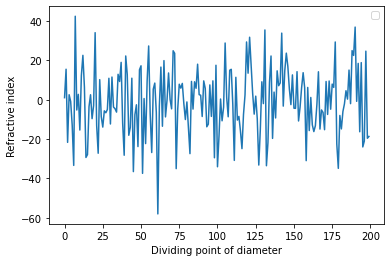

NameError: name 'path' is not defined

In [8]:
pred = gan.predict('./1.5_0.015.csv')
y = pred.flatten()
x = np.arange(len(y))
plt.plot(x, y)
plt.legend()
plt.xlabel('Dividing point of diameter')
plt.ylabel('Refractive index')
plt.show()

np.save(path+'/Pred_gen{}{}{}{}{}-{}{}{}{}{}_dis{}{}{}{}{}-{}{}{}{}{}_{}{}-{}.npy'.format\
(g_l1,g_h1,g_ad1_1,g_ad1_2,g_ac1,g_l2,g_h2,g_ad2_1,g_ad2_2,g_ac2,\
 d_l1,d_h1,d_ad1_1,d_ad1_2,d_ac1,d_l2,d_h2,d_ad2_1,d_ad2_2,d_ac2,op,lr,lo), pred)
np.save(path+'/Losses_gen{}{}{}{}{}-{}{}{}{}{}_dis{}{}{}{}{}-{}{}{}{}{}_{}{}-{}.npy'.format\
(g_l1,g_h1,g_ad1_1,g_ad1_2,g_ac1,g_l2,g_h2,g_ad2_1,g_ad2_2,g_ac2,\
 d_l1,d_h1,d_ad1_1,d_ad1_2,d_ac1,d_l2,d_h2,d_ad2_1,d_ad2_2,d_ac2,op,lr,lo), gan.losses)
np.save(path+'/Params_gen{}{}{}{}{}-{}{}{}{}{}_dis{}{}{}{}{}-{}{}{}{}{}_{}{}-{}.npy'.format\
(g_l1,g_h1,g_ad1_1,g_ad1_2,g_ac1,g_l2,g_h2,g_ad2_1,g_ad2_2,g_ac2,\
 d_l1,d_h1,d_ad1_1,d_ad1_2,d_ac1,d_l2,d_h2,d_ad2_1,d_ad2_2,d_ac2,op,lr,lo), gan.params)